In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Load the data
df_debentures = pd.read_csv('tabela_debentures.csv')
pd.options.display.float_format = '{:,.2f}'.format
#change the name of the first column to Dados do Evento
columns = ["Dados do evento", "Data de pagamento",
               "Prazos (dias úteis)", "Dias entre pagamentos", "Expectativa de juros (%)", "Juros projetados", "Amortizações", "Fluxo descontado (R$)","Ativo"]
df_debentures.columns = columns
df_debentures

,Dados do evento,Data de pagamento,Prazos (dias úteis),Dias entre pagamentos,Expectativa de juros (%),Juros projetados,Amortizações,Fluxo descontado (R$),Ativo
0,Juros,17/03/2025,11,124,-,"42,202742","0,00000000","42,036551",VERO13
1,Juros,15/09/2025,137,126,-,"42,897257","0,00000000","40,840177",VERO13
2,Juros,16/03/2026,262,125,-,"42,549944","0,00000000","38,733305",VERO13
3,Juros,15/09/2026,388,126,-,"42,897257","0,00000000","37,323878",VERO13
4,Juros,15/03/2027,510,122,-,"41,508671","0,00000000","34,569323",VERO13
...,...,...,...,...,...,...,...,...,...
664,Juros|Amortização,17/03/2036,2765,122,-,"9,656672","62,419157","30,877709",AESOA1
665,Juros|Amortização,15/09/2036,2891,126,-,"7,982635","62,419157","29,017696",AESOA1
666,Juros|Amortização,16/03/2037,3016,125,-,"5,938715","62,419095","27,115917",AESOA1
667,Juros|Amortização,15/09/2037,3142,126,-,"3,991319","62,419188","25,345259",AESOA1


In [69]:
# load the data Relatório de Posição 2024-12-19.xlsx
df_posicao = pd.read_excel('Relatório de Posição 2025-02-21.xlsx', sheet_name='Worksheet')
df_posicao

,Data,Sub Classe,Emissor,Fundo,Ativo,Estratégia,Vencimento do ativo,Duration,Quantidade,Pu Posição,Valor,Valor Exposição,% PL
0,21-02-2025,Titulos Públicos,TESOURO NACIONAL,AF DEB INCENTIVADAS,NTN-B50,IPCA+ (-15),15/08/2050,-,235,"3,782.85","888,970.33",NaN,7.41
1,21-02-2025,LFSN,BANCO BTG PACTUAL S.A.,BH FIRF INFRA,LFSN210099R,IPCA+ (1),19/11/2031,-,1,"431,143.76","431,143.76",NaN,0.36
2,21-02-2025,LFSN,BANCO BTG PACTUAL S.A.,HORIZONTE,LFSN210099R,IPCA+ (1),19/11/2031,-,1,"431,705.21","431,705.21",NaN,0.18
3,21-02-2025,Fundos Imobiliários,AF INVEST FUNDO DE INVESTIMENTO IMOBILIARIO,REAL FIM,AFHI11,IPCA+ (2.177),NaN,-,4007,89.98,"360,549.86",NaN,0.97
4,21-02-2025,Debêntures,VERO S.A.,AF DEB INCENTIVADAS,VERO13,IPCA+ (230),15/03/2031,4.02y,230,"1,039.03","238,977.95",NaN,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,21-02-2025,CRA,ISEC SECURITIZADORA S.A.,AF INVEST GERAES PREV,CRA Ferroeste 2ª Série,IPCA+ (116),15/04/2031,-,116,"1,132.07","131,319.76",NaN,3.04
65,21-02-2025,CRA,ISEC SECURITIZADORA S.A.,FIRF GERAES,CRA Ferroeste 2ª Série,IPCA+ (2.730),15/04/2031,-,2730,"1,107.48","3,023,429.89",NaN,0.59
66,21-02-2025,CRA,ISEC SECURITIZADORA S.A.,FIRF GERAES 30,CRA Ferroeste 2ª Série,IPCA+ (2.371),15/04/2031,-,2466,"1,107.48","2,731,054.25",NaN,0.98
67,21-02-2025,CRA,ISEC SECURITIZADORA S.A.,HORIZONTE,CRA Ferroeste 2ª Série,IPCA+ (3.549),15/04/2031,-,3549,"1,107.48","3,930,458.85",NaN,1.60


In [70]:
vero13 = df_debentures[df_debentures["Ativo"] == "VERO13"]
vero13_posicao = df_posicao[df_posicao["Ativo"] == "VERO13"]
vero13_posicao

,Data,Sub Classe,Emissor,Fundo,Ativo,Estratégia,Vencimento do ativo,Duration,Quantidade,Pu Posição,Valor,Valor Exposição,% PL
4,21-02-2025,Debêntures,VERO S.A.,AF DEB INCENTIVADAS,VERO13,IPCA+ (230),15/03/2031,4.02y,230,"1,039.03","238,977.95",NaN,1.99
5,21-02-2025,Debêntures,VERO S.A.,BH FIRF INFRA,VERO13,IPCA+ (3.467),15/03/2031,4.02y,3467,"1,039.03","3,602,332.81",NaN,3.00


In [71]:
qntd = vero13_posicao["Quantidade"].sum()
qntd

3697

In [72]:
vero13

,Dados do evento,Data de pagamento,Prazos (dias úteis),Dias entre pagamentos,Expectativa de juros (%),Juros projetados,Amortizações,Fluxo descontado (R$),Ativo
0,Juros,17/03/2025,11,124,-,"42,202742","0,00000000","42,036551",VERO13
1,Juros,15/09/2025,137,126,-,"42,897257","0,00000000","40,840177",VERO13
2,Juros,16/03/2026,262,125,-,"42,549944","0,00000000","38,733305",VERO13
3,Juros,15/09/2026,388,126,-,"42,897257","0,00000000","37,323878",VERO13
4,Juros,15/03/2027,510,122,-,"41,508671","0,00000000","34,569323",VERO13
5,Juros,15/09/2027,638,128,-,"43,592217","0,00000000","34,675372",VERO13
6,Juros,15/03/2028,763,125,-,"42,549944","0,00000000","32,362244",VERO13
7,Juros,15/09/2028,890,127,-,"43,244681","0,00000000","31,425937",VERO13
8,Juros|Amortização,15/03/2029,1011,121,-,"41,161802","347,293312","270,300572",VERO13
9,Juros,17/09/2029,1139,128,-,"29,061492","0,00000000","19,31453",VERO13


In [73]:
vero13["Juros projetados"] = vero13["Juros projetados"].str.replace(',', '.').astype(float)
vero13["Amortizações"] = vero13["Amortizações"].str.replace(',', '.').astype(float)
vero13

C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\2596161820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vero13["Juros projetados"] = vero13["Juros projetados"].str.replace(',', '.').astype(float)
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\2596161820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vero13["Amortizações"] = vero13["Amortizações"].str.replace(',', '.').astype(float)


,Dados do evento,Data de pagamento,Prazos (dias úteis),Dias entre pagamentos,Expectativa de juros (%),Juros projetados,Amortizações,Fluxo descontado (R$),Ativo
0,Juros,17/03/2025,11,124,-,42.20,0.00,"42,036551",VERO13
1,Juros,15/09/2025,137,126,-,42.90,0.00,"40,840177",VERO13
2,Juros,16/03/2026,262,125,-,42.55,0.00,"38,733305",VERO13
3,Juros,15/09/2026,388,126,-,42.90,0.00,"37,323878",VERO13
4,Juros,15/03/2027,510,122,-,41.51,0.00,"34,569323",VERO13
5,Juros,15/09/2027,638,128,-,43.59,0.00,"34,675372",VERO13
6,Juros,15/03/2028,763,125,-,42.55,0.00,"32,362244",VERO13
7,Juros,15/09/2028,890,127,-,43.24,0.00,"31,425937",VERO13
8,Juros|Amortização,15/03/2029,1011,121,-,41.16,347.29,"270,300572",VERO13
9,Juros,17/09/2029,1139,128,-,29.06,0.00,"19,31453",VERO13


In [76]:
vero13["Juros projetados"] = vero13["Juros projetados"] * qntd
vero13["Amortizações"] = vero13["Amortizações"] * qntd

#Criar nova coluna com mês de pagamento e ano
vero13["Data de pagamento"] = pd.to_datetime(vero13["Data de pagamento"])
vero13["Mês"] = vero13["Data de pagamento"].dt.month
vero13["Ano"] = vero13["Data de pagamento"].dt.year

#Agrupar mês por semestre
vero13["Semestre"] = np.where(vero13["Mês"] <= 6, "1º Semestre", "2º Semestre")
vero13

C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\3859284925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vero13["Juros projetados"] = vero13["Juros projetados"] * qntd
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\3859284925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vero13["Amortizações"] = vero13["Amortizações"] * qntd
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\3859284925.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the def

,Dados do evento,Data de pagamento,Prazos (dias úteis),Dias entre pagamentos,Expectativa de juros (%),Juros projetados,Amortizações,Fluxo descontado (R$),Ativo,Mês,Ano,Semestre
0,Juros,2025-03-17,11,124,-,"156,023.54",0.00,"42,036551",VERO13,3,2025,1º Semestre
1,Juros,2025-09-15,137,126,-,"158,591.16",0.00,"40,840177",VERO13,9,2025,2º Semestre
2,Juros,2026-03-16,262,125,-,"157,307.14",0.00,"38,733305",VERO13,3,2026,1º Semestre
3,Juros,2026-09-15,388,126,-,"158,591.16",0.00,"37,323878",VERO13,9,2026,2º Semestre
4,Juros,2027-03-15,510,122,-,"153,457.56",0.00,"34,569323",VERO13,3,2027,1º Semestre
5,Juros,2027-09-15,638,128,-,"161,160.43",0.00,"34,675372",VERO13,9,2027,2º Semestre
6,Juros,2028-03-15,763,125,-,"157,307.14",0.00,"32,362244",VERO13,3,2028,1º Semestre
7,Juros,2028-09-15,890,127,-,"159,875.59",0.00,"31,425937",VERO13,9,2028,2º Semestre
8,Juros|Amortização,2029-03-15,1011,121,-,"152,175.18","1,283,943.37","270,300572",VERO13,3,2029,1º Semestre
9,Juros,2029-09-17,1139,128,-,"107,440.34",0.00,"19,31453",VERO13,9,2029,2º Semestre


In [ ]:
# I need to cross the quantidy of the debentures in relatorio de posicao with the Juros projetados of each debentures in tabela_debentures for each data time in tabela_debentures

# I will create a new data frame with the name of the debentures and the quantity of each one in the relatorio de posicao
df_quantidade = df_posicao.groupby('Ativo').sum()
df_quantidade = df_quantidade[['Quantidade','Valor']]
df_quantidade

df_quantidade['Valor'] = df_quantidade['Valor'].astype(str)
#Replace the ',' for '.' in the column valor
df_quantidade['Valor'] = df_quantidade['Valor'].str.replace(',', '.')
df_quantidade['Valor'] = df_quantidade['Valor'].astype(float)
df_quantidade




,Quantidade,Valor
Ativo,,
AESOA1,2070,"2,080,992.99"
AFHI11,4007,"360,549.86"
ALGAB1,5106,"5,455,349.09"
ARTR19,390,"494,668.82"
BHSA11,1000,"1,000,477.78"
BRFS31,7033,"9,656,211.11"
BRKP28,2500,"2,752,347.08"
CAEC12,105,"107,198.47"
CAEC21,4800,"5,866,826.20"


In [ ]:
# I will create a new data frame with the name of the debentures and the Juros projetados of each one in the tabela_debentures for each data time in tabela_debentures
df_juros = df_debentures[['Juros projetados', 'Ativo', 'Data de pagamento']]
df_juros



,Juros projetados,Ativo,Data de pagamento
0,"42,202742",VERO13,17/03/2025
1,"42,897257",VERO13,15/09/2025
2,"42,549944",VERO13,16/03/2026
3,"42,897257",VERO13,15/09/2026
4,"41,508671",VERO13,15/03/2027
...,...,...,...
664,"9,656672",AESOA1,17/03/2036
665,"7,982635",AESOA1,15/09/2036
666,"5,938715",AESOA1,16/03/2037
667,"3,991319",AESOA1,15/09/2037


In [ ]:
#Preciso analisar a quantidade de datas diferentes em df_juros e df_quantidade
df_juros['Data de pagamento'].value_counts()

Data de pagamento
17/03/2025    10
16/03/2026    10
15/09/2026    10
15/03/2027    10
15/09/2027    10
              ..
16/11/2037     1
15/05/2037     1
17/11/2036     1
15/05/2036     1
15/03/2044     1
Name: count, Length: 188, dtype: int64

In [ ]:
#Preciso criar faixas semestrais para as datas de pagamento e criar uma nova coluna em df_juros com essas faixas
df_juros['Data de pagamento'] = pd.to_datetime(df_juros['Data de pagamento'])
df_juros['Data de pagamento'] = df_juros['Data de pagamento'].dt.to_period('M')
df_juros['Data de pagamento'].value_counts()


C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\37621864.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_juros['Data de pagamento'] = pd.to_datetime(df_juros['Data de pagamento'])
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\37621864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juros['Data de pagamento'] = pd.to_datetime(df_juros['Data de pagamento'])
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\37621864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Data de pagamento
2025-03    11
2026-03    11
2026-09    11
2027-03    11
2027-09    11
           ..
2039-11     1
2040-05     1
2040-11     1
2041-05     1
2044-03     1
Freq: M, Name: count, Length: 172, dtype: int64

In [ ]:
#Criar uma nova coluna so com o ano separado. E criar uma coluna falando se é no primeiro ou segundo semestre   
df_juros['Ano'] = df_juros['Data de pagamento'].dt.year
df_juros['Semestre'] = df_juros['Data de pagamento'].dt.quarter
df_juros['Semestre'] = df_juros['Semestre'].replace({1: '1º Semestre', 2: '1º Semestre', 3: '2º Semestre', 4: '2º Semestre'})
df_juros

C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\3025564850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juros['Ano'] = df_juros['Data de pagamento'].dt.year
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\3025564850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_juros['Semestre'] = df_juros['Data de pagamento'].dt.quarter
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_20476\3025564850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Juros projetados,Ativo,Data de pagamento,Ano,Semestre
0,"42,202742",VERO13,2025-03,2025,1º Semestre
1,"42,897257",VERO13,2025-09,2025,2º Semestre
2,"42,549944",VERO13,2026-03,2026,1º Semestre
3,"42,897257",VERO13,2026-09,2026,2º Semestre
4,"41,508671",VERO13,2027-03,2027,1º Semestre
...,...,...,...,...,...
664,"9,656672",AESOA1,2036-03,2036,1º Semestre
665,"7,982635",AESOA1,2036-09,2036,2º Semestre
666,"5,938715",AESOA1,2037-03,2037,1º Semestre
667,"3,991319",AESOA1,2037-09,2037,2º Semestre


In [ ]:
#Colocar a quantidade de ativo em df_juros
df_juros = df_juros.merge(df_quantidade, on='Ativo')
df_juros

,Juros projetados,Ativo,Data de pagamento,Ano,Semestre,Quantidade,Valor
0,"42,202742",VERO13,2025-03,2025,1º Semestre,3697,"3,841,310.76"
1,"42,897257",VERO13,2025-09,2025,2º Semestre,3697,"3,841,310.76"
2,"42,549944",VERO13,2026-03,2026,1º Semestre,3697,"3,841,310.76"
3,"42,897257",VERO13,2026-09,2026,2º Semestre,3697,"3,841,310.76"
4,"41,508671",VERO13,2027-03,2027,1º Semestre,3697,"3,841,310.76"
...,...,...,...,...,...,...,...
664,"9,656672",AESOA1,2036-03,2036,1º Semestre,2070,"2,080,992.99"
665,"7,982635",AESOA1,2036-09,2036,2º Semestre,2070,"2,080,992.99"
666,"5,938715",AESOA1,2037-03,2037,1º Semestre,2070,"2,080,992.99"
667,"3,991319",AESOA1,2037-09,2037,2º Semestre,2070,"2,080,992.99"


In [ ]:
df_juros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Juros projetados   669 non-null    object   
 1   Ativo              669 non-null    object   
 2   Data de pagamento  669 non-null    period[M]
 3   Ano                669 non-null    int64    
 4   Semestre           669 non-null    object   
 5   Quantidade         669 non-null    int64    
 6   Valor              669 non-null    float64  
dtypes: float64(1), int64(2), object(3), period[M](1)
memory usage: 36.7+ KB


In [ ]:
#Fazer a média dos juros projetados para cada semestre com base na quantidade de ativos
df_juros['Juros projetados'] = df_juros['Juros projetados'].str.replace(',', '.').astype(float)
df_juros['Juros projetados no ATIVO'] = df_juros['Juros projetados'] * df_juros['Quantidade'] * df_juros['Valor']
df_juros 

#Trocar a posição da primeira coluna com a segunda
df_juros = df_juros[['Ativo', 'Juros projetados', 'Juros projetados no ATIVO', 'Data de pagamento', 'Ano', 'Semestre', 'Quantidade']]
df_juros

,Ativo,Juros projetados,Juros projetados no ATIVO,Data de pagamento,Ano,Semestre,Quantidade
0,VERO13,42.20,"599,334,892,159.75",2025-03,2025,1º Semestre,3697
1,VERO13,42.90,"609,197,926,003.10",2025-09,2025,2º Semestre,3697
2,VERO13,42.55,"604,265,620,907.84",2026-03,2026,1º Semestre,3697
3,VERO13,42.90,"609,197,926,003.10",2026-09,2026,2º Semestre,3697
4,VERO13,41.51,"589,478,163,705.08",2027-03,2027,1º Semestre,3697
...,...,...,...,...,...,...,...
664,AESOA1,9.66,"41,597,616,149.17",2036-03,2036,1º Semestre,2070
665,AESOA1,7.98,"34,386,441,476.83",2036-09,2036,2º Semestre,2070
666,AESOA1,5.94,"25,581,938,269.14",2037-03,2037,1º Semestre,2070
667,AESOA1,3.99,"17,193,227,199.90",2037-09,2037,2º Semestre,2070


In [ ]:
df_juros_agrupado = df_juros.groupby(['Ano', 'Semestre'])

df_juros_agrupado = df_juros_agrupado.agg({'Juros projetados no ATIVO': 'sum', 'Quantidade': 'sum'})
df_juros_agrupado['Juros projetados'] = df_juros_agrupado['Juros projetados no ATIVO'] / df_juros_agrupado['Quantidade']
df_juros_agrupado = df_juros_agrupado.reset_index()
df_juros_agrupado

,Ano,Semestre,Juros projetados no ATIVO,Quantidade,Juros projetados
0,2025,1º Semestre,"7,452,774,253,493.14",55651,"133,919,862.24"
1,2025,2º Semestre,"10,910,633,189,031.84",277822,"39,272,027.37"
2,2026,1º Semestre,"10,769,796,569,581.90",278032,"38,735,816.63"
3,2026,2º Semestre,"10,823,403,106,517.91",277822,"38,958,049.06"
4,2027,1º Semestre,"10,416,679,144,974.78",278032,"37,465,756.26"
5,2027,2º Semestre,"10,544,335,334,077.52",277822,"37,953,565.00"
6,2028,1º Semestre,"9,902,163,497,282.65",276920,"35,758,209.94"
7,2028,2º Semestre,"9,628,195,118,683.76",276710,"34,795,255.39"
8,2029,1º Semestre,"8,859,505,018,378.70",276920,"31,993,012.49"
9,2029,2º Semestre,"8,701,084,257,222.28",271055,"32,100,807.06"


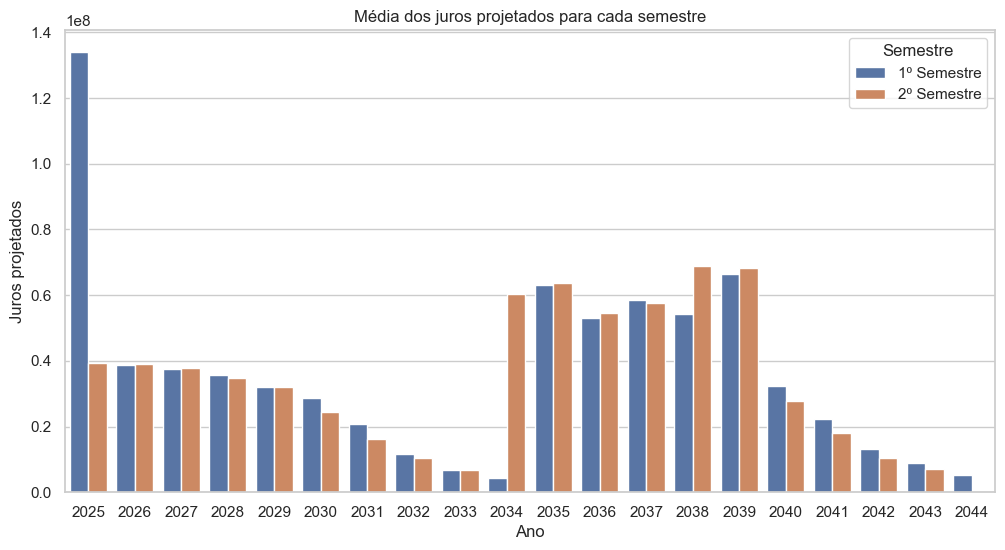

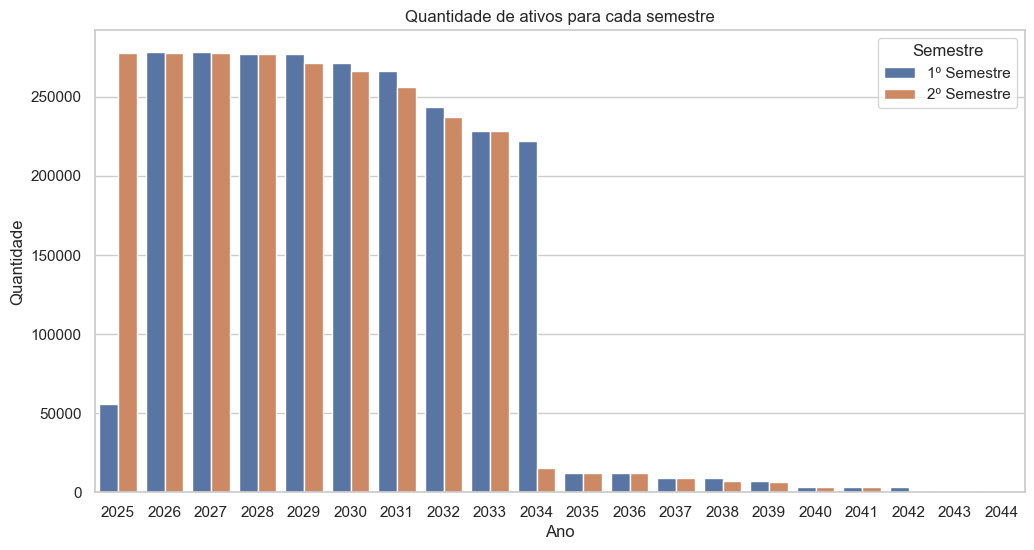

In [ ]:
#Testar se a média dos juros projetados está correta
df_juros_agrupado['Juros projetados'].mean()

#Criar um gráfico com a média dos juros projetados para cada semestre
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Juros projetados', hue='Semestre', data=df_juros_agrupado)
plt.title('Média dos juros projetados para cada semestre')
plt.show()

#Criar um gráfico com a quantidade de ativos para cada semestre
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Quantidade', hue='Semestre', data=df_juros_agrupado)
plt.title('Quantidade de ativos para cada semestre')
plt.show()